## 电影数据分析案例
### 数据集
数据集包含3个csv文件，文件中包含电影名字，发行时间，评分用户信息，评分等信息

http://grouplens.org/datasets/movielens/

评分表  
196	242	3	881250949  
186	302	3	891717742  
22	377	1	878887116  
244	51	2	880606923  
166	346	1	886397596  
298	474	4	884182806  
115	265	2	881171488  
253	465	5	891628467  
305	451	3	886324817  


用户信息表  
1|24|M|technician|85711  
2|53|F|other|94043  
3|23|M|writer|32067  
4|24|M|technician|43537  
5|33|F|other|15213  

电影表  
1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0  
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0  
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0  
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0   
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#支持中文显示
mpl.rcParams['font.family']='Kaiti'
# 使用非unicode的负号，当使用中文时候要设置
mpl.rcParams['axes.unicode_minus']=False
%matplotlib inline

### 数据加载

In [2]:
# 加载用户信息 user id | age | gender | occupation | zip code
user_cols=['user_id','age','gender','occupation','zip_cod']
users = pd.read_csv('data/ml-100k/u.user',sep='|',names=user_cols,encoding='latin-1')

# 加载电影信息 movie id | movie title | release date | video release date | IMDb URL
movie_cols=['movie_id','movie_title','release_date','video_release_date','imdb_url']
movies = pd.read_csv('data/ml-100k/u.item',sep='|',names=movie_cols,usecols=range(5),encoding='latin-1')

# 加载评分信息 user id | item id | rating | timestamp
rating_cols=['user_id','movie_id','rating','unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data',sep='\t',names=rating_cols,encoding='latin-1')


# 为了后续分组统计数据方便，将3个DataFrame进行合并
# 和并用户 评分
user_ratings = pd.merge(users,ratings)
data = pd.merge(user_ratings,movies)
data

,user_id,age,gender,occupation,zip_cod,movie_id,rating,unix_timestamp,movie_title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
5,60,50,M,healthcare,06472,61,4,883326652,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
6,76,20,M,student,02215,61,4,875028123,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
7,94,26,M,student,71457,61,5,891720761,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
8,144,53,M,programmer,20910,61,3,888106182,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
9,154,25,M,student,53703,61,4,879138657,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


### 数据探索和清洗

In [3]:
# data.describe()
# data['gender'].value_counts()

# 缺失值处理
# data.shape  (100000, 12)
# data.isnull().sum()

# 删除video_release_date
data.dropna(axis=1,how='all',inplace=True)
data.isnull().sum()

# 重复值查看
# data.duplicated().any()

user_id            0
age                0
gender             0
occupation         0
zip_cod            0
movie_id           0
rating             0
unix_timestamp     0
movie_title        0
release_date       9
imdb_url          13
dtype: int64

### 评分最多电影

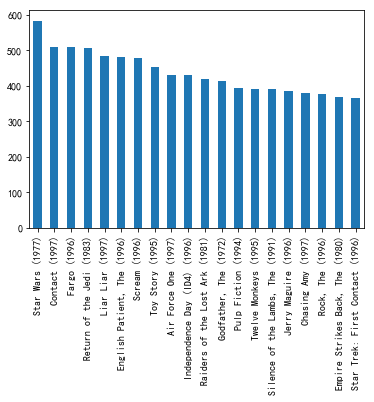

In [4]:
# 按照电影标题分组，统计分组中数据个数，即得到评分次数
# g = data.groupby('movie_title')
# count = 0
# for k,v in g:
#     if count==3:
#         break
#     display(k,v)
#     count+=1

# data.groupby('movie_title').size().sort_values(ascending=False).head(20)
data['movie_title'].value_counts().head(20).plot(kind='bar')

### 评分最高

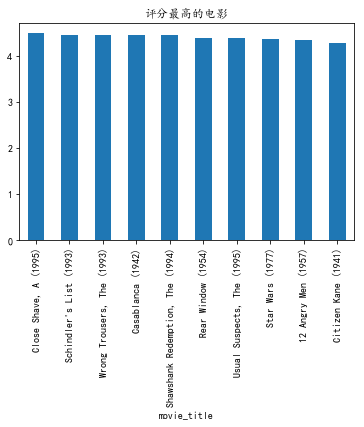

In [5]:
# 根据电影标题分组，对分组中评分求均值，均值越高，评分也就越高
movie_scores = data.groupby('movie_title').agg({'rating':['size','mean']})
# movie_scores
# 过滤，评分人数必须大于等于100
size_more_100 = movie_scores['rating']['size']>=100
d=movie_scores[size_more_100].sort_values([('rating','mean')],ascending=False).head(10)

d['rating']['mean'].plot(kind='bar',title='评分最高的电影')

### 分析评分人数中最多的百部电影

In [6]:
data['movie_title'].value_counts().head(100)

Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
English Patient, The (1996)                     481
Scream (1996)                                   478
Toy Story (1995)                                452
Air Force One (1997)                            431
Independence Day (ID4) (1996)                   429
Raiders of the Lost Ark (1981)                  420
Godfather, The (1972)                           413
Pulp Fiction (1994)                             394
Twelve Monkeys (1995)                           392
Silence of the Lambs, The (1991)                390
Jerry Maguire (1996)                            384
Chasing Amy (1997)                              379
Rock, The (1996)                                378
Empire Strikes Back, The (1980)                 367
Star Trek: F

### 评分与年龄关系

In [7]:
# 简单看下年龄分布
# data['age'].describe()
# data['age'].plot(kind='hist',bins=30,figsize=(12,6))

# 自定义年龄区间，分布不同年龄组对电影评分总体状况
# 0-9  10-19 20-29 ...70-79
# np.arange(0,81,10)
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
data['age_group'] = pd.cut(data['age'],np.arange(0,81,10),right=False,labels=labels)
data.groupby('age_group').agg({'rating':['size','mean']})
#年龄越大的区间，对电影打分越高 

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [15]:
# 不同年龄段对某个电影的评分
# 只分析评分次数排在前100的电影--》如何得到评分次数在前100的电影
# 得到评分次排在前100的电影的id信息，同时将数据movie_id列设置为行索引，利用索引数组来获得评分次数排在前100的电影的数据
# 如何得到一部电影，不同年龄段评分
#           0-9  10-19  ....
# 空军一号  4.1   4.2   ....
# 将最内层行索引untack为列索引
# 外层行索引 内层行索引
# 空军一号 0-9        4.1
#          10-19      4.2 
# 根据movie_title和age_group进行分组，对分组对象中rating进行mean

# 得到评分次数在前100的电影
# 得到评分次排在前100的电影的id信息
# most_100=data['movie_id'].value_counts().head(100)
# most_100
# 数据movie_id列设置为行索引
# data.set_index('movie_id',inplace=True)
# by_age_group = data.loc[most_100.index].groupby(['movie_title','age_group'])
by_age_group['rating'].mean().unstack(1).fillna(0).head(10)

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
movie_title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Amadeus (1984),0.0,4.250000,4.067308,4.236842,4.081633,4.230769,4.750000,5.000000
Apocalypse Now (1979),0.0,4.400000,4.050633,4.132353,3.700000,4.187500,4.142857,5.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Babe (1995),0.0,3.909091,3.894737,4.032258,4.060606,4.150000,4.600000,3.000000
